    T-498-GAGR 2017-1        Reykjavik University        Final Project        Edda Steinunn Rúnarsdóttir
   

-----

# ** Meteorite Landings Analysis** 
### **Exploration of Possible Factors and Predictive Analysis**
***22.02.2017***

-----

## Table of Contents:
* ** Introduction **
* ** The data **
    - **Importing and cleaning**
    - ** Exploring value ranges**
        - Exploring classes
* ** Exploring attributes **
    - ** Geographical exploration **
        - Map of all records
        - Where do asteroids land?
        - Where do the largest asteroids hit?
        - Danger zones: where dangerous meteorites land
    - ** Chronological exploration **
        - Are meteorite discoveries increasing?
            - Years 600-1800
            - Years 1800-1970
            - Years 1970-present
        - Time and place for asteroids
    - ** Found versus seen falling **
        - Where do meteorite falls go unnoticed?
        - Where are meteorite falls seen?
        - Are heavier asteroids more visible?
* ** What does the data tell us? **
     - ** Predictive analysis **
         - Can we expect an increase in meteorites?
         - Where can we expect to find the most meteorites in the future?
     - ** Conclusion **
* ** References **

# Introduction

Meteorites are astronomical objects that can be described as solid chunks of debris. Many meteorites have entered and survived earth's atmosphere and caused impact with earth's surface. Meteorites can become meteors when the atmosphere causes meteorites to heat up and radiate energy, making their fall visible and, according to popular belief, miraculously granting you one wish if you see it.

We can benefit from those impacts intellectually - meteorites can be of high importance for scientific research and for exploring the history of the universe. Some meteorites that have landed on the planet are one of our few sources of the oldest material we can access. However, heavy meteorites' impacts often lead to damages of various extent for earth. For example, modern theory (*the Cretaceous–Paleogene extinction event hypothesis*) states that an asteroid impact that hit the Earth in present-day Mexico is responsible for the extinction of the dinosaurs. Heavy meteorites have even caused a few deaths in present time, latest death caused by a meteorite was in February 2016 in India.

*But where do the dangerous ones impact? Where are meteorites most likely to be found for research? Are meteorites becoming more common on earth?*

Being able to answer those questions could help predicting and preventing damages caused by meteorites and faciliate meteorite search and research. This project explores factors of meteorite landings and uses predictive technique to give a possible answer to those questions from data.

# The Data
 The open data set analysed for this project is a data set of over 45.000 meteorite landings on Earth (data extracted by *NASA*). The meteorite landing dataset had the following attributes:

|Attributes     |    Description                                                                          |
|---            |---                                                                                      |
| *name*        |  the name of meteorite                                                                  |
| *id*          |  unique ID for meteorite                                                                |
| *nametype*    |  If *Valid*: typical meteorite <br> If *Relict*: meteorite has been degraded by weather |
|  *recclass*   |  classification of meteorite                                                            |
|  *mass*       |  meteorite's mass in grams                                                              |
|  *fall*       |  If *Fell*: the fall was observed, confirming it became a meteor <br> If *Found*: fall was   not observed             |
|  *year*       |  the year of asteroid fall, or year it was found                                        |
|  *reclat*     |  the latitude of landing                                                                |
|  *reclong*    |  the longitude of landing                                                               |
| *GeoLocation* |  the longitude and latitude combined in string                                          |

Now necessary libraries imported for data mining and analysis

In [1]:
# Necessary libraries imported

import numpy as np                                  # Imported for linear algebra
import pandas as pd                                 # Imported for data processing
import matplotlib.pyplot as plt                     # Imported for plotting library
from mpl_toolkits.basemap import Basemap            # Imported for plotting maps
import seaborn as sns                               # Imported for prettier figures
from matplotlib.ticker import *                     # Imported for axis manipulation
from scipy.stats import gaussian_kde                # Imported for density mapping
import statsmodels.formula.api as smf               # Imported for linear regression
import statsmodels.api as sm                        # Imported for linear regression
from sklearn.cluster import KMeans                  # Imported for K-means clustering
import pylab as plt                                 # Imported for x-tics manipulation

### Importing and cleaning

Data imported for meteorite landings database using pandas library. We also want to look at dataset information and take a peek at head entries of database, for better understanding of the data.

In [2]:
# Data imported for Meteorite Landings database
# ML = Meteorite Landings, uncleaned original database

ML = pd.read_csv('MeteoriteLandings.csv')           # Reads from .csv file Meteorite Landings database
ML.info()                                           # Displays entries info of database
ML.head()                                           # Displays first few entires of database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
name           45716 non-null object
id             45716 non-null int64
nametype       45716 non-null object
recclass       45716 non-null object
mass           45585 non-null float64
fall           45716 non-null object
year           45428 non-null float64
reclat         38401 non-null float64
reclong        38401 non-null float64
GeoLocation    38401 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


As seen above, the dataset has 45.716 entries of asteroid impacts. But obviously many of their columns are NULL values which limits the accuracy for some data exploration. Moreover, not all asteroids are marked "Valid" in the "nametype" column in database, meaning some asteroids can yield wrong or insignificant data due to asteroid being severly damaged by earth's weather on impact. So in order to work with a neccessary non-null column dataframe, data is cleaned so it contains only valid asteroid impacts with known column values.

Data cleaned:

In [3]:
# Omitting invalid data such as impossible values and null values into ValidMLData

ValidMLData = ML.groupby('nametype').get_group('Valid').copy()  # Isolates 'Valid' meteorites from nametype attribute
ValidMLData.dropna(inplace = True)                              # Drops null values from table
ValidMLData = ValidMLData[ValidMLData.year <= 2017]             # Omitting impossible values in case input is off
ValidMLData = ValidMLData[ValidMLData.mass > 0]
ValidMLData.year = ValidMLData.year.astype(int)                 # Changing into better fitting variable types


ValidMLData.info()                                              # Displayes entries info

# ValidMLData now represents our "cleaned" database
# i.e. database with no NULL values and with valid asteroids only

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38093 entries, 0 to 45715
Data columns (total 10 columns):
name           38093 non-null object
id             38093 non-null int64
nametype       38093 non-null object
recclass       38093 non-null object
mass           38093 non-null float64
fall           38093 non-null object
year           38093 non-null int64
reclat         38093 non-null float64
reclong        38093 non-null float64
GeoLocation    38093 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 3.2+ MB


Valid entires of 31.095 landings were isolated out of the 45.716 entries in database. Data in ValidMLData dataframe should now be relevant and valid and is now ready for accurate mining and inspection where appropriate.

## Exploring value ranges

How far do the records of meteorite landings go? What are the value ranges? Let's begin by exploring that to get a better idea on how to work with our data.

**Numerical ranges: chronology and mass**

In [4]:
# Printing value ranges of years using our cleaned database

print("Chronological range:")
print("First meteorite landing recorded in " + ValidMLData.year.min().astype(int).astype(str))
print("Most recent meteorite landing recorded in " + ValidMLData.year.max().astype(int).astype(str))

Chronological range:
First meteorite landing recorded in 601
Most recent meteorite landing recorded in 2013


In [5]:
# Printing value ranges of mass using our cleaned database

print("Weight range:")
print("Lightest meteorite recorded is " + ValidMLData.mass.min().astype(str) + " grams")
print("Heaviest meteorite recorded is " + ValidMLData.mass.max().astype(str) + " grams")

Weight range:
Lightest meteorite recorded is 0.01 grams
Heaviest meteorite recorded is 60000000.0 grams


Now we know that years of our cleaned dataframe contains records from the year 601 until 2013 and meteorite mass of the cleaned dataframe ranges from 0.01 gram to 60.000.000 grams: 60 tons! Both are quite wide ranges. Now we can explore the year and mass attributes with these ranges in mind.

### Exploring ranges of meteorite classes

Now let's explore ranges of classes (recclass) in our cleaned dataframe. How many are they?

In [6]:
# Printing amount of distinct classes of meteorites

print(str((len(ValidMLData.recclass.unique()))) + " distinct classes of meteorites")

418 distinct classes of meteorites


Over 400 classes is a bit too much to wrap ones head around when analysing, especially when focusing on classifying meteorites. Upon research, the classification can be reduced to a few subgroups via the traditional classification to a few major classes: 
- Stony meteorites
- Stony–iron meteorites
- Iron meteorites

Stony meteorites are by far the largest class, and stony-iron the smallest.<br>
*(**Source:** Norton: Rocks from Space, 1998)*

Let's classify records into the three supergroups, using feature extraction of recclass attribute to construct classification tables

In [7]:
# Stony-Iron meteorites consist of Mesoderites and Pallasites only

Stony_Iron_Meteorites = ValidMLData[(ValidMLData['recclass'].str.contains("Mesosiderite"))
                                 | (ValidMLData['recclass'].str.contains("mesoiderite"))
                                 | (ValidMLData['recclass'].str.contains("Pallasite"))
                                 | (ValidMLData['recclass'].str.contains("pallasite"))]

# Iron meteorites consist of every entry that contains "Iron" and "II"
# along with octahedrites (abbrieviated OC in dataframe)

Iron_Meteorites = ValidMLData[(ValidMLData['recclass'].str.contains("iron"))
                            | (ValidMLData['recclass'].str.contains("Iron"))
                            | (ValidMLData['recclass'].str.contains("II"))
                            | (ValidMLData['recclass'].str.startswith("OC"))]

# Everything else that is not Stony-Iron or Iron meteorites that starts with L, H, R, K, C, E,
# and everything else that is a -ite of some kind and lunar and martian meteorites belong to Stony Meteorites group

Stony_Meteorites = ValidMLData[(ValidMLData['recclass'].str.startswith("L"))
                             | (ValidMLData['recclass'].str.startswith("H"))
                             | (ValidMLData['recclass'].str.startswith("R"))
                             | (ValidMLData['recclass'].str.startswith("K"))
                             | (ValidMLData['recclass'].str.startswith("C"))
                             | (ValidMLData['recclass'].str.startswith("E"))
                             | (ValidMLData['recclass'].str.contains("ite"))
                             | (ValidMLData['recclass'].str.contains("Lunar"))
                             | (ValidMLData['recclass'].str.contains("Martian"))
                             | (ValidMLData['recclass'].str.contains("Stone"))]

# Ommiting what is previously defined in other groups in case of overlap
# (which is very likely for -ites such as Pallasites not belonging to the Stoney meteorite group)

Stony_Meteorites = Stony_Meteorites[~Stony_Meteorites.recclass.isin(Iron_Meteorites.recclass)]
Stony_Meteorites = Stony_Meteorites[~Stony_Meteorites.recclass.isin(Stony_Iron_Meteorites.recclass)]

Now that we've classified the subgroups into the three supergroups, let's see if the classification was successful and that the three classes cover entire dataframe:

In [8]:
# Checking how much of the data our new supergroups span porportionally

print("After classifying into the three traditional super-groups, the groups span: ")
print(str(((len(Stony_Meteorites)+len(Stony_Iron_Meteorites)+len(Iron_Meteorites))/
                 len(ValidMLData))*100)
                  + "% of the data")

After classifying into the three traditional super-groups, the groups span: 
100.0% of the data


Our classification spans the entire data, meaning it was successful. Lets add our classification to a dataframe for later use and exploration:

In [9]:
# Joining dataframes into a single dataframe with an extra column "classification

Stony_Meteorites = Stony_Meteorites.assign(classification = "Stony")     # Setting column with classifications
Stony_Iron_Meteorites = Stony_Iron_Meteorites.assign(classification = "Stony-Iron")     
Iron_Meteorites = Iron_Meteorites.assign(classification = "Iron")
ValidML_classification = pd.concat([Iron_Meteorites,                     # Joining all into a single dataframe
                                    Stony_Meteorites,
                                    Stony_Iron_Meteorites],
                                   ignore_index=True)
ValidML_classification.head()                                            # Peek at new dataframe

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,classification
0,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981,39.91667,42.81667,"(39.916670, 42.816670)",Iron
1,Avce,4906,Valid,"Iron, IIAB",1230.0,Fell,1908,46.00000,13.50000,"(46.000000, 13.500000)",Iron
2,Bahjoi,4922,Valid,"Iron, IAB-sLL",10322.0,Fell,1934,28.48333,78.50000,"(28.483330, 78.500000)",Iron
3,Ban Rong Du,4934,Valid,"Iron, ungrouped",16700.0,Fell,1993,16.66667,101.18333,"(16.666670, 101.183330)",Iron
4,Bogou,5097,Valid,"Iron, IAB-MG",8800.0,Fell,1962,12.50000,0.70000,"(12.500000, 0.700000)",Iron


Let's now check with our new dataframe if previous statement stands: that sony meteorites are the largest class, then iron class and stony-iron is the smallest:

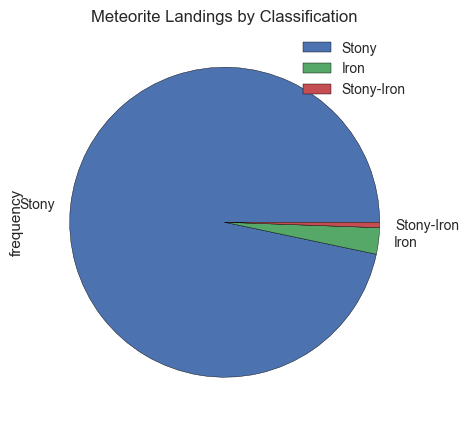

In [10]:
# Viewing distribution of classification with a pie chart

ValidML_classification_freq = pd.value_counts(ValidML_classification.classification).reset_index()
ValidML_classification_freq.columns = ["classification", "frequency"]
ValidML_classification_freq.plot("classification", "frequency",
                 labels = ['Stony',
                           'Iron',
                           'Stony-Iron'],
                 kind='pie',
                 figsize=(5, 5))
plt.title('Meteorite Landings by Classification')
plt.show()

Our dataframe with superclasses is consistent with real distribution of the classification.

# Exploring attributes

## Geograpical exploration

Before being able to explore locations of meteorite landings, let's begin by cleaning the data in a way that it fits what we're exploring. For geographical exploring let's begin by clearing out NULL values in location columns of dataframe:

In [11]:
ML_Locations = ML[pd.notnull(ML['reclat'])]
ML_Locations = ML_Locations[pd.notnull(ML_Locations['reclong'])]

First of all, in order to better visualize geographical locations in this project a basemap is defined in a function, intended for further exploration of locations. Basemap is designed as a light blue *Robinson Map Projection* basemap, distingushing continents, countries and sea.

In [12]:
# Basemap BSMP set for further explaination in project
# Basemap plotting function

def plotProjectBasemap():
    ocean_color = '#DFE9F7'                                  # Setting colors and size of figure
    land_color =  '#9BB2C7'
    BSMP = Basemap (projection = 'robin',                    # Robinson map projection chosen
                    lon_0      =      10,
                    lat_0      =      50)
    BSMP.drawmapboundary( color       =  ocean_color,        # Coloring and adding "pretty" to base map
                          fill_color  =  ocean_color)
    BSMP.fillcontinents ( color       =  land_color ,
                          lake_color  =  ocean_color)
    BSMP.drawcountries  ( color       =  ocean_color)
    return BSMP

### Map of all records

Logical first step is exploring the geographical locations of all valid meteorite landings on our basemap:

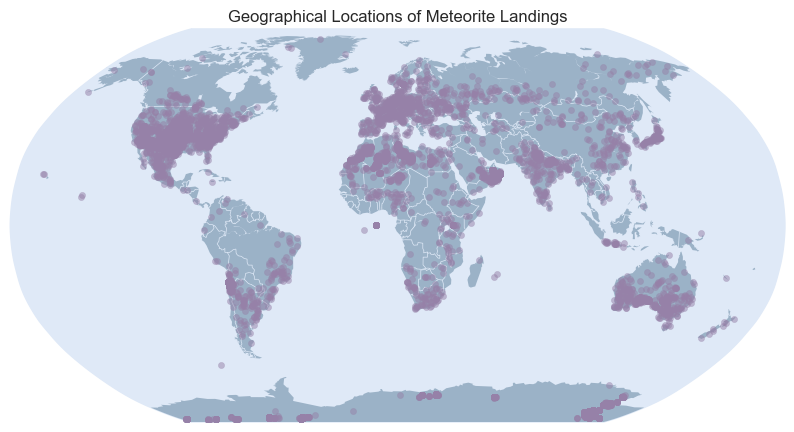

In [13]:
# Plotting meteorite landings all time on the project basemap

plt.figure(figsize = (10, 6 )) 
ML_Locations_All_Time = plotProjectBasemap()                         # Basemap plotted

x, y = ML_Locations_All_Time(ML_Locations.reclong.values,
                             ML_Locations.reclat.values)             # Basemap's X and Y are latitude/longitude

ML_Locations_All_Time.scatter(x, y,                                  # Data scattered on basemap
             marker = 'o',
             color = '#9681A8',
             zorder = 10,
             alpha = 0.5)
 
plt.title('Geographical Locations of Meteorite Landings')
plt.show()                                                           # Figure displayed

A strange distribution. Excluding the data found in the ocean and on the South Pole one could even hypothesise that meteorite landings correlate with human population density. But a fairly safe hypothesis would be that most meteorites fall within USA, West-Europe, India and South coast of Australia since the data seems to be more dense in those areas. With another figure that shows density with colors (darker color being more dense area), we can test this hypothesis. 

### Where do meteorites land?

Let's find out where meteorite landings are most frequent with a density map, demonstrating more dense data on map in darker color.

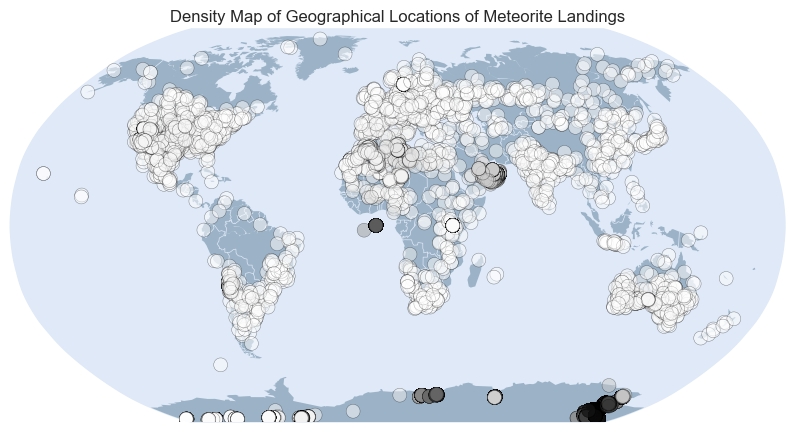

In [14]:
# Plots density of all time geographical locations of meteorite landings
# Takes awhile due to the gaussian kde algorithm that determines the colors

plt.figure(figsize = (10, 6)) 
densityMap = plotProjectBasemap()
x, y = densityMap(ML_Locations.reclong.values,
                  ML_Locations.reclat.values) 

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

densityMap.scatter(x, y,
                   c = z,
                   s=100,
                   marker = 'o',
                   zorder = 10,
                   alpha = 0.5)

plt.title('Density Map of Geographical Locations of Meteorite Landings')
plt.show()

Our hypothesis was proven wrong, since the most dense area is on the **South Pole** and second most dense area is curiously around the exact "middle of the earth" on mainstream map projections. Let's begin by looking at how much data falls on the equator.

In [15]:
# Printing sum of values with lat and long as 0
sum = pd.value_counts((ML_Locations[(ML_Locations['reclong'] == 0) & (ML_Locations['reclat'] == 0)]).reclong)
print(sum)

0.0    6214
Name: reclong, dtype: int64


Given how porportionally little data is recorded elsewhere in Earth's ocean, we can safely deduce that locations of these 6.000+ meteorite landings (16% of all data with non-null location) is not accurate and their locations are unknown. Hence their longitude and latitude is recorded as 0, meaning our previous NULL check didn't work as planned because it only omitted true NULL values, not 0 values.

Let's therefore update our dataframe of meteorite locations, now only with known values of longitude and latitude that are not set at the equator. Of course this is not a 100% safe method, since this porportionally large amount of meteorites technically could have landed in the exact same place precisely at the equator but given how extremely unlikely that is, this approach will be used anyway.

In [16]:
# Update dataframe where no location values are neither unknown (NULL) or 0
ML_Locations = ML_Locations[(ML_Locations['reclong'] != 0) & (ML_Locations['reclat'] != 0)]

# Update other dataframes as well that will require accurate locations
ValidMLData = ValidMLData[(ValidMLData['reclong'] != 0) & (ValidMLData['reclat'] != 0)]
ValidML_classification = ValidML_classification[(ValidML_classification['reclong'] != 0) & (ValidML_classification['reclat'] != 0)]
Iron_Meteorites = Iron_Meteorites[(Iron_Meteorites['reclong'] != 0) & (Iron_Meteorites['reclat'] != 0)]

Now that we're done with looking at the equator, let's look at the South Pole with a pole projection basemap.

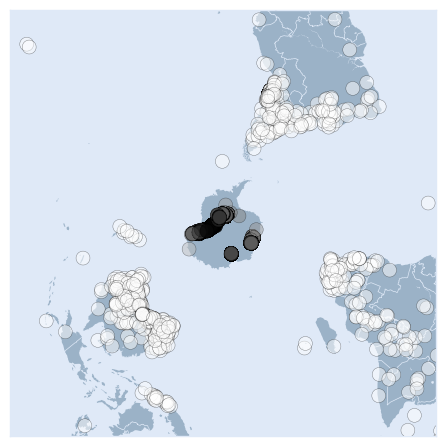

In [17]:
# Plotting basemap for densest area of meteorite landings, the South Pole

ocean_color = '#DFE9F7'                                  # Setting colors
land_color =  '#9BB2C7'
    
SPole = Basemap(projection='spstere',                    # 'spstere' for South-Pole projection
                boundinglat= -0,
                lon_0= 90,
                resolution='l')                  

SPole.drawmapboundary( color       =  ocean_color,        # Coloring and adding "pretty" to base map
                       fill_color  =  ocean_color)
SPole.fillcontinents ( color       =  land_color ,
                       lake_color  =  ocean_color)
SPole.drawcountries  ( color       =  ocean_color)

x, y = SPole(ML_Locations.reclong.values,
             ML_Locations.reclat.values)                  # Selecting data for basemap

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

SPole.scatter(x, y,                                       # Data scattered on basemap
             marker = 'o',
             c = z,
             s = 100,
             zorder = 10,
             alpha = 0.5)

plt.show()

The South Pole (Antartica, middle on figure) shows the records of frequent meteorite landings. Curiously, the continents or countries surrounding Antartica have their most dense data of meteorite landings on the coast pointing to Antartica.

### Danger zones: where dangerous meteorites land

As evident by our previous range check, the range of meteorites mass is very distributed. Let's therefore simplify the concept by looking only at extremely dangerously heavy asteroids in context to their places of impact. Asteroids whose mass was measured above one ton (1.000 KGs, 1000.000 grams) will be defined as extremely dangerous in this project, which is a weight that will do a lot of damage on impact, not to mention adding meteorite's speed at the time of impact to the equation. Let's explore how many those meteorites are:

In [18]:
# Using ValidMLData dataframe because we're working with multiple attributes
# Extracting masses above ton from cleaned database

Mass_Above_Ton = ValidMLData[ValidMLData.mass >= 1000000]

# Checking number of "dangerous asteroids" recorded
Num_Of_Mass_Above_Ton = len(Mass_Above_Ton.index)+1
All_Meteorites = len(ValidMLData.index)+1
print("Number of Asteroids with Mass Above One Ton: " + str(Num_Of_Mass_Above_Ton))
print(str(round((Num_Of_Mass_Above_Ton/All_Meteorites * 100), 2)) + "% of all meteorites")

Number of Asteroids with Mass Above One Ton: 54
0.17% of all meteorites


Fortunately only about 0.2% are extremely dangerous. Let's plot their location:

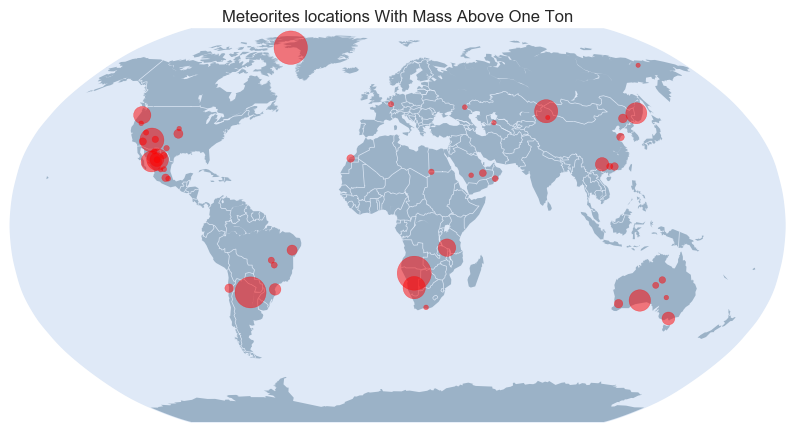

In [19]:
# Using ValidMLData dataframe because we're working with multiple attributes
# Showing dangerously large mass of asteroids (1 ton)
plt.figure(figsize = (10, 6)) 
ML_Mass_Loc = plotProjectBasemap()                           # Basemap plotted

x, y = ML_Mass_Loc(Mass_Above_Ton.reclong.values,
                   Mass_Above_Ton.reclat.values)             # Basemap's X and Y are latitude/longitude

ML_Mass_Loc.scatter(x, y,                                    # Data scattered on basemap
             marker = 'o',
             color = 'red',
             s = Mass_Above_Ton["mass"]*0.00001,
             zorder = 10,
             alpha = 0.5)
 
plt.title('Meteorites locations With Mass Above One Ton')
plt.show()                                                   # Figure displayed

Judging by the figure, certain areas seem to be more prone to recieve dangerously heavy asteroids than others. Lower USA and Mexio seem the most dangerous areas for large asteroids. Curiously, around that exact area (in Yucatán Peninsula, México) specialists believe that the asteroid responsible of the extinction of dinosaurs landed according to modern theory.

But what are the dangerous asteroids made of? Let's revisit our dataframe of meteorite superclasses.

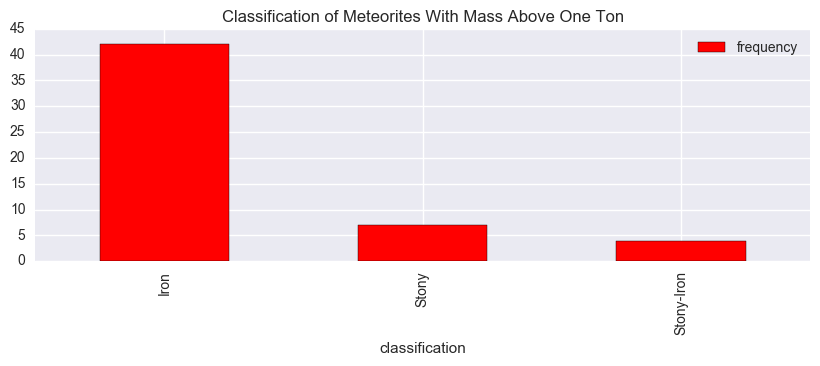

In [20]:
ValidML_classification_danger = ValidML_classification[ValidML_classification.id.isin(Mass_Above_Ton.id)]
ValidML_classification_danger = pd.value_counts(ValidML_classification_danger.classification).reset_index()
ValidML_classification_danger.columns = ["classification", "frequency"]
ValidML_classification_danger.plot("classification", "frequency",
                                    kind = 'bar',
                                    color = 'red',
                                    figsize = (10, 3)) 
plt.title('Classification of Meteorites With Mass Above One Ton')
plt.show()

Obviously dangerous asteroids are mostly classified as iron, but just how much of them is classified as iron?

In [21]:
print(str(round(((ValidML_classification_danger.loc[ValidML_classification_danger['classification'] == 'Iron', 'frequency'].iloc[0])/(ValidML_classification_danger.frequency.sum()))*100)) + "% of dangerous asteroids are classified as Iron")

79.0% of dangerous asteroids are classified as Iron


Let's check if this only applies to dangerous asteroids, or if Iron classification generally much heavier:

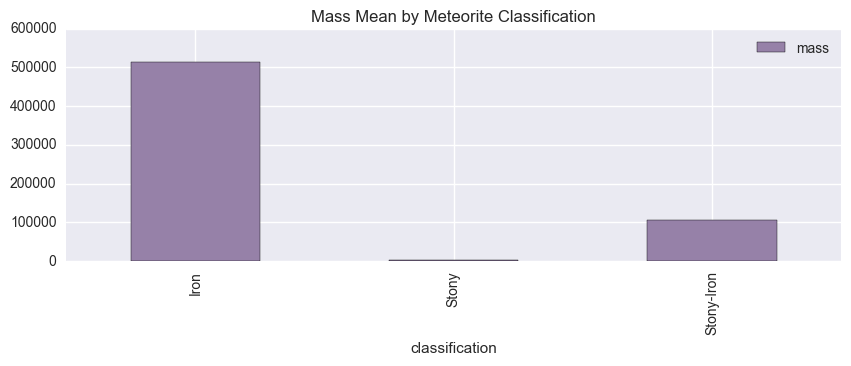

In [22]:
((ValidML_classification.groupby('classification')).mean().reset_index()).plot("classification", "mass",
                                 kind = 'bar',
                                 color = '#9681A8',
                                 figsize = (10, 3)) 
plt.title('Mass Mean by Meteorite Classification')
plt.show()

So now we know what to avoid: iron meteorites! Despite them being a small porportion of all meteorites that impact the earth they are in majority of dangerous meteorites. Let's map density of all iron meteorites on a map to further define the danger zones:

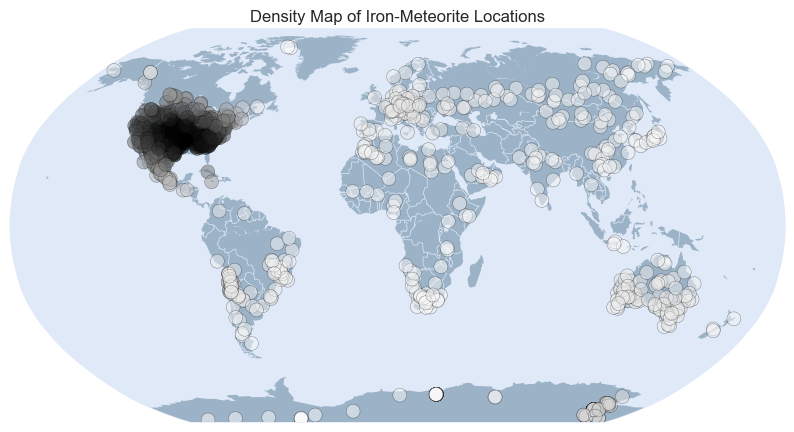

In [23]:
plt.figure(figsize = (10, 6 ))
ML_iron_locations = plotProjectBasemap()

x, y = ML_iron_locations(Iron_Meteorites.reclong.values,
                         Iron_Meteorites.reclat.values) 

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

ML_iron_locations.scatter(x, y,              # Data scattered on same basemap
                           marker = 'o',
                           c = z,
                           zorder = 10,
                           s = 100,
                           alpha = 0.5)

plt.title('Density Map of Iron-Meteorite Locations')
plt.show()

So to sum up - danger zone is definately **America** and **Mexico** as they are much more prone than other parts of the world to recieve impacts from iron meteorites and therefore to receieve impact from heavier meteorites.

## Chronological exploration

Let's begin by cleaning the data appropriately before exploring meteorite's timeline by clearning out null values in year column and invalid year entries (in case), and finally setting year as int type for better calculations:

In [24]:
# Omitting NULL values in the year column and preventing any illegal years in case

ML_chonological = ML[pd.notnull(ML['year'])]

Our first logical step of chronologial exploration would be to explore the frequency of all landings recorded in respect to year recorded. First we create a frequency dataframe of number of landings reported by year. We will revisit this dataframe whenever landings frequency is explored by year.

In [25]:
# Using a little data wrangling for a frequency table
# States how often meteorite landings were recorded in a year

ML_Frq_By_Year = pd.value_counts(ML_chonological.year).reset_index()         # Counts occurences distinctly by year
ML_Frq_By_Year.columns = ['year', 'frequency']                               # Columns are year and freq
ML_Frq_By_Year = ML_Frq_By_Year.sort_values(by = 'year', ascending=True)     # Sorted by year

### Are discoveries of meteorites increasing?

Let's begin with the most logical step: exploring frequency distribution of meteorite landings of all time.

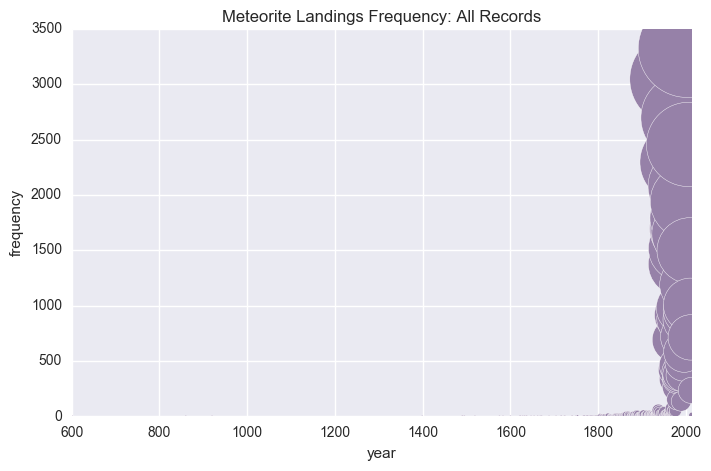

In [26]:
# Using the frequency dataframe, we plot yearly frequency of meteorite landing records of all time.
# Scatter chosen to display frequency

col = '#9681A8'
g = ML_Frq_By_Year.plot("year", "frequency",
                         kind = 'scatter',
                         c = '#9681A8',
                         edgecolor = 'white',
                         s = (ML_Frq_By_Year['frequency']*1.5), # And for a dramatic enhance: enlarge points 
                                                                # porportionally higher on the y-scale by 0.5
                         figsize=(8,5))
plt.ylim(0)
plt.xlim(600,2013)                                              # Plotting 600-2017 according to previous value range check
plt.title('Meteorite Landings Frequency: All Records')
plt.show()

Meteorite records seem to skyrocket right before and after the 21st century. Let's explore this further.

#### Years 300-1800

Let's begin by viewing the frequency of meteorite landing records by century to observe when most meteorite landings are recorded.

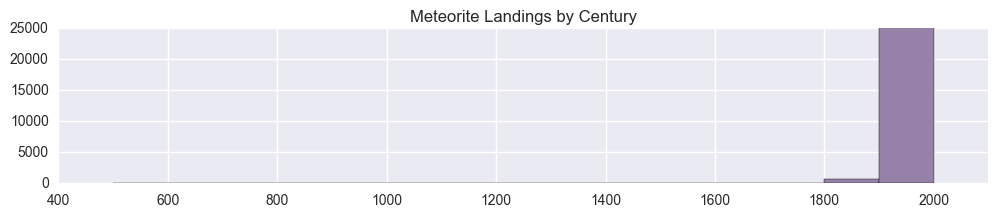

In [27]:
ML_chonological.year.hist(bins = np.arange(400, 2100, 100),
                      figsize=(12,2),
                      color = '#9681A8')
plt.title('Meteorite Landings by Century')
plt.xlim(400,2100)
plt.ylim(0,25000)
plt.show()

Obviously, data before 1800s only spans about a fraction of a fraction of the data, meaning either very few meteorite landings were observed or found before that time or that they were not recorded as frequently. Let's divide the data into periods of meteorite landings according to frequency to simplify later observation. Let's name data before the 1800s the "ancient" period and create a new dataset of it:

In [28]:
# Creating Dataset of meteorite landings before 1800s ("ancient period")
# (feature engineering)
MLData_Ancient = ML_chonological[ML_chonological.year < 1800]            # Create new dataset for period
Freq_Ancient = ML_Frq_By_Year[ML_Frq_By_Year.year < 1800]                # Create new frequency table for period

#### Years 1800-1970

Now let's explore data above the ancient period and look at meteorite landings after 1800s, now by decade:

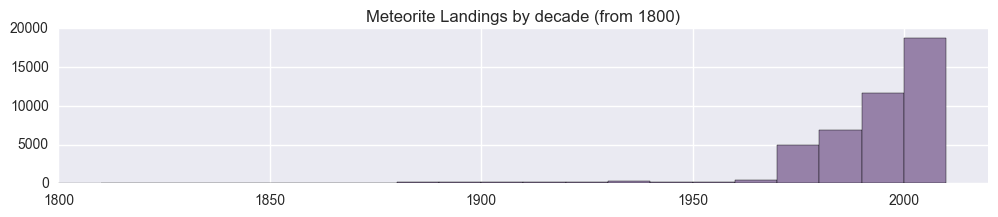

In [29]:
ML_chonological.year.hist(bins = np.arange(1800, 2020, 10),
                      figsize=(12,2),
                      color = '#9681A8')
plt.title('Meteorite Landings by decade (from 1800)')
plt.xlim(1800,2020)
plt.show()

As we can see we can further divide our data into periods since significantly more data is recorded after the 1970s. Let's therefore create a dataset of the period 1800-1970 called the "past" period of meteorite landings.

In [30]:
# Creating Dataset of meteorite landings from 1800-1970 ("past period")
# (feature engineering)

MLData_Past = ML_chonological[(ML_chonological.year > 1800) &
                              (ML_chonological.year <= 1970)]       # Create new dataset for period
Freq_Past = ML_Frq_By_Year[(ML_Frq_By_Year.year > 1800) &
                           (ML_Frq_By_Year.year <= 1970)]           # Create new frequency table for period

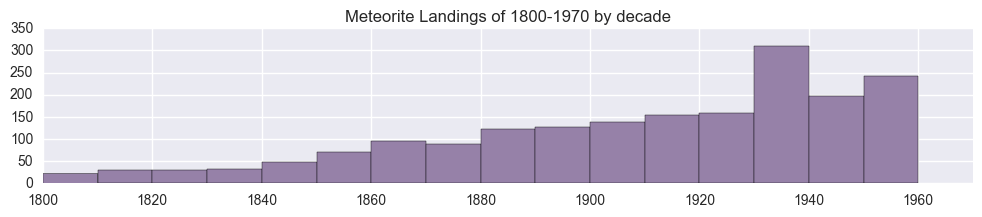

In [31]:
MLData_Past.year.hist(bins = np.arange(1800, 1970, 10),
                      figsize=(12,2),
                      color = '#9681A8')
plt.title('Meteorite Landings of 1800-1970 by decade')
plt.xlim(1800,1970)
plt.show()

Seems to be gradually ascending during the period.

#### Years 1970-present

That leaves us with the "present" period of meteorite landings, i.e. meteorite landings after 1970.

In [32]:
# Creating Dataset of meteorite landings from 1970- ("present period")
# (feature engineering)

MLData_Present = ML_chonological[ML_chonological.year > 1970]        # Create new dataset for period
Freq_Present = ML_Frq_By_Year[ML_Frq_By_Year.year > 1970]            # Create new frequency table for period

Once we've classified the data into periods, let's create a dataset containing frequency by period and vizualize the frequency distribution.

In [33]:
# Creating dataframe with frequency by periods

Period_Freq = pd.DataFrame(np.zeros((3, 2)))
Period_Freq.columns = ["Period", "Frequency"]
Period_Freq["Period"] = "Ancient (1200 year span)", "Past (170 year span)", "Present (43 year span)"
Period_Freq["Frequency"] = Freq_Ancient.frequency.sum(), Freq_Past.frequency.sum(), Freq_Present.frequency.sum()

# Preview of dataframe
Period_Freq

,Period,Frequency
0,Ancient (1200 year span),62
1,Past (170 year span),2282
2,Present (43 year span),43084


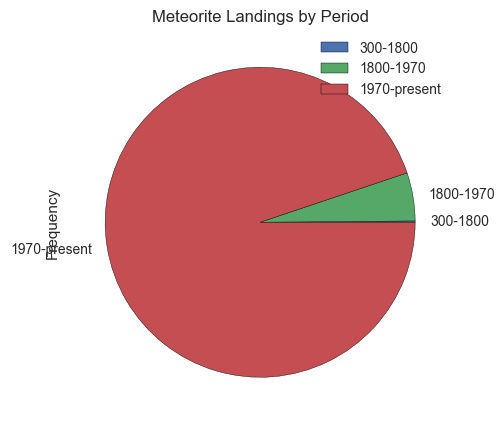

In [34]:
Period_Freq.plot("Period", "Frequency",
                 labels = ['300-1800',
                           '1800-1970',
                           '1970-present'],
                 kind='pie',
                 figsize=(5, 5))
plt.title('Meteorite Landings by Period')

plt.show()

Obviously, the "present period", after 1970, contains porportionally almost all records of meteorite landings. So **YES**, discoveries of meteorites have definately been increasing!

### Time and place for asteroids

Let's explore whether chronological and geographical attributes of entries correlate in some way.

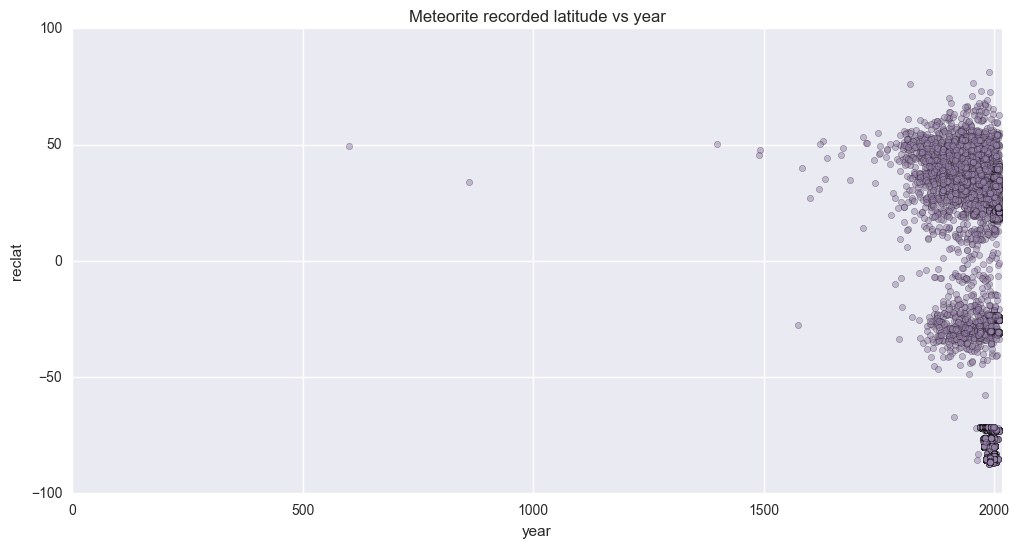

In [35]:
# Scatter by year and latitude
# Using cleaned dataframe to explore multiple attributes

ValidMLData.plot("year", "reclat",
            color='#9681A8',
            kind = 'scatter',
            figsize=(12,6),
            alpha = 0.5)

plt.xlim(0,2017)

plt.title('Meteorite recorded latitude vs year')
plt.show()

Some latitude values are definately more prone to meteorite landings according to figure, and those areas seem to be increasing in meteorite record frequency over the years. That is, a definite clutter of three "groups" of latitude can be defined from the figure, and their point density is obviously increasing by year. This leads us to believe that increase in discovery of meteorites supports our idea that those latitudes are more prone to meteorite landings. This figure is revisited in predictive analysis and analysed into three different clusters.

Let's explore if same goes with longitude.

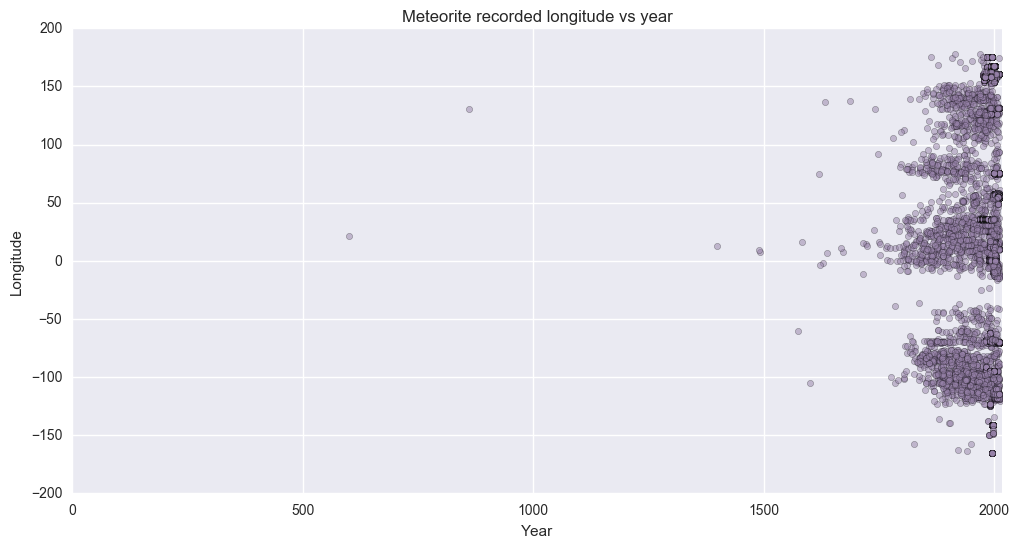

In [36]:
# Scatter by year and longitude
# Using cleaned dataframe to explore multiple attributes

ValidMLData.plot("year", "reclong",
            color='#9681A8',
            kind = 'scatter',
            figsize=(12,6),
            alpha = 0.5)

plt.xlim(0,2017)

plt.ylabel('Longitude')
plt.xlabel('Year')
plt.title('Meteorite recorded longitude vs year')
plt.show()

Data is more scattered in this figure and groups of clusters not as distingushable, but figure still shows groups of dense points and a definite increase in density those "groups", meaning we might be able to classify location into groups.

## Found versus seen falling

As we're mainly interested in geographical correlation of wheather meteorite falls were observed or not, we will create dataframe that fits both of those explorations. Clearing out NULL values of the fall attribute using our dataframe with non-null locations for a geograpical exploration, then creating dataframe for found and seen falling:

In [37]:
# Cleaning and extracting feature to explore observed/unobserved falls

ML_Geo_Fall_Found = ML_Locations[pd.notnull(ML_Locations['fall'])]          # Dataframe with known "fall" attribute
ML_Seen = ML_Geo_Fall_Found[ML_Geo_Fall_Found.fall == 'Fell']               # Dataframe of meteorites seen fall
ML_Found = ML_Geo_Fall_Found[ML_Geo_Fall_Found.fall == 'Found']             # Dataframe of meteorites not seen fall

### Where are falls observed?

Let's plot a figure to find out.

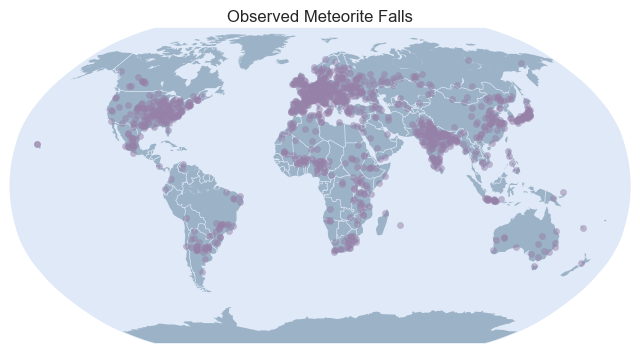

In [38]:
ML_Fall = plotProjectBasemap()

x, y = ML_Fall(ML_Seen.reclong.values,
               ML_Seen.reclat.values) 

ML_Fall.scatter(x, y,
                marker = 'o',
                color = '#9681A8',
                zorder = 10,
                alpha = 0.5)

plt.title('Observed Meteorite Falls')
plt.show()

Judging by the figure above, observed falls data is not present in the ocean or on Antartica. In fact, data of observed falls is only present where population is fairly high.

### Where aren't falls observed?

Let's plot a figure to find out.

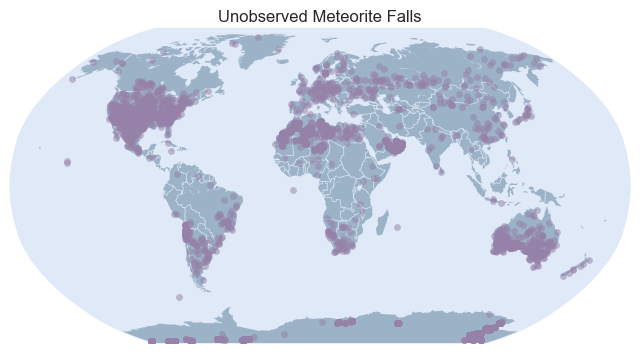

In [39]:
ML_Unseen = plotProjectBasemap()

x, y = ML_Unseen(ML_Found.reclong.values,
                 ML_Found.reclat.values) 

ML_Unseen.scatter(x, y,                   # Data scattered on same basemap
             marker = 'o',
             color = '#9681A8',
             zorder = 10,
             alpha = 0.5)

plt.title('Unobserved Meteorite Falls')
plt.show()

### Are heavier asteroids more visible?

It is highly likely that heavier asteroid can be larger and therefore their falls are more likely to be noticed. Let's test that hypothesis with a plot containing meteorites whose fall was observed and meteorites found afterwards where points are enlarged that have higher asteroid mass.

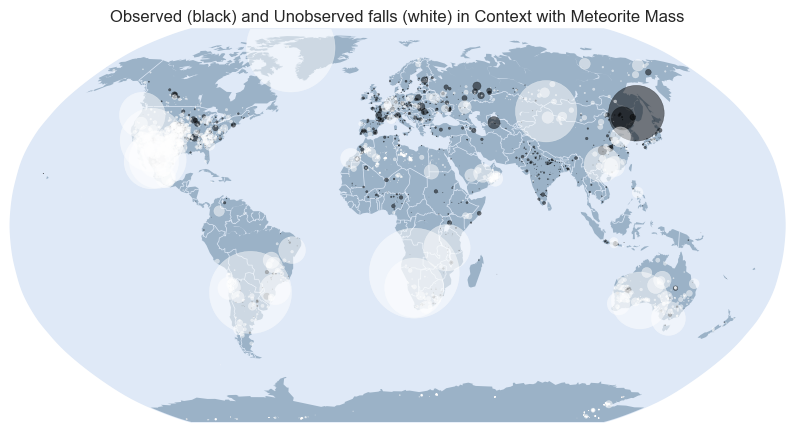

In [40]:
# Using ValidMLData, our cleaned dataframe because working with multiple attributes
# Plotting observed and unobserved falls in context with mass

Valid_Found = ValidMLData[ValidMLData.fall == 'Found'] 
Valid_Fell = ValidMLData[ValidMLData.fall == 'Fell'] 


plt.figure(figsize = (10, 6 )) 
Seen_Found_Mass = plotProjectBasemap()                        # Basemap plotted

x, y = Seen_Found_Mass(Valid_Fell.reclong.values,
                       Valid_Fell.reclat.values)              # Basemap's X and Y are latitude/longitude

Seen_Found_Mass.scatter(x, y,                                 # Data scattered on basemap
                        marker = 'o',
                        color = 'black',
                        s = (Valid_Fell['mass']*0.00007),    # Enhancing points with larger mass by a fraction
                        zorder = 10,
                        alpha = 0.5)

x, y = Seen_Found_Mass(Valid_Found.reclong.values,
                       Valid_Found.reclat.values)             # Basemap's X and Y are latitude/longitude

Seen_Found_Mass.scatter(x, y,                                 # Data scattered on basemap
                        marker = 'o',
                        color = 'white',
                        s = (Valid_Found['mass']*0.00007),    # Enhancing points with larger mass by a fraction
                        zorder = 10,
                        alpha = 0.5)
 
plt.title('Observed (black) and Unobserved falls (white) in Context with Meteorite Mass')
plt.show()                                                    # Figure displayed

According to figure, larger (heavier) asteroids are not more likely to be observed falling. In fact, larger asteroids seem to be in almost all cases unobserved and found later. Let's plot another figure to confirm this suspicion.

In [41]:
import warnings
warnings.filterwarnings("ignore")
ValidMLData.fall[ValidMLData.fall  == 'Fell'] = 1 
ValidMLData.fall [ValidMLData.fall  == 'Found'] = 0

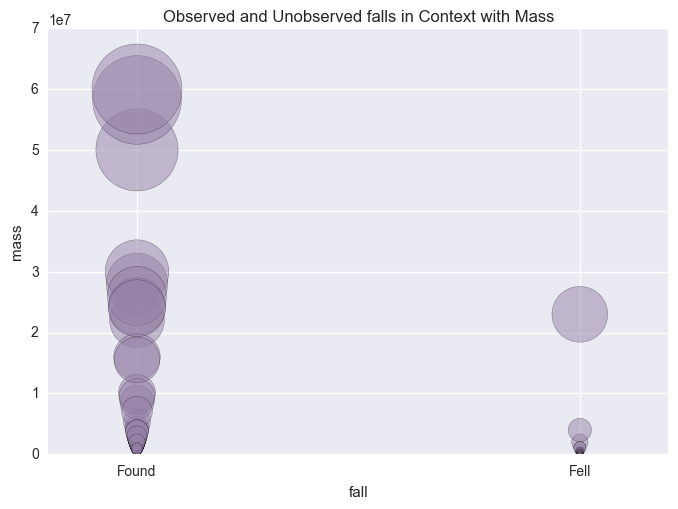

In [42]:
# Plotting mass vs observed falls


x = [0,1]                                         # Fixing x-tics
labels = ['Found', 'Fell']                        # Setting to found and fell instead of 0 and 1

ValidMLData.plot('fall', 'mass',
                kind = 'scatter',
                color = '#9681A8',
                s = (ValidMLData['mass']*0.00007),
                alpha = 0.5)

plt.xticks(x, labels)

plt.title('Observed and Unobserved falls in Context with Mass')
plt.ylim(0)
plt.show()

Figure tells us that except for one meteorite fall record, meteorite falls are more likely to go unnoticed if meteorite is heavy - regardless of the landing place being in populated areas. This unfortunately could indicate that a heavy meteorite is not more likely to become a meteor and we won't see the most dangerous meteorites coming!

# What does the data tell us?

## Predicative analysis

### Can we expect an increase in meteorite landings?

Looking at figure plotted of meteorite frequency by decade from 1800s in previous section of *Chronological Exploration* we notice a definite increase in meteorite records. Can we thus predict that meteorite landings are increasing? Not yet, we need to verify that an increase is present. One way is analysing the linear regression of increase in meteorite landings by decade and creating a predictive model. Let frequency be the independent variable and decades the dependent variable.

*Focusing on results from 1970 since exploring the year attribute of data revealed that data was most dense after that year, and dropping data after 2010s since the following decade is not yet passed and should therefore not affect the results*

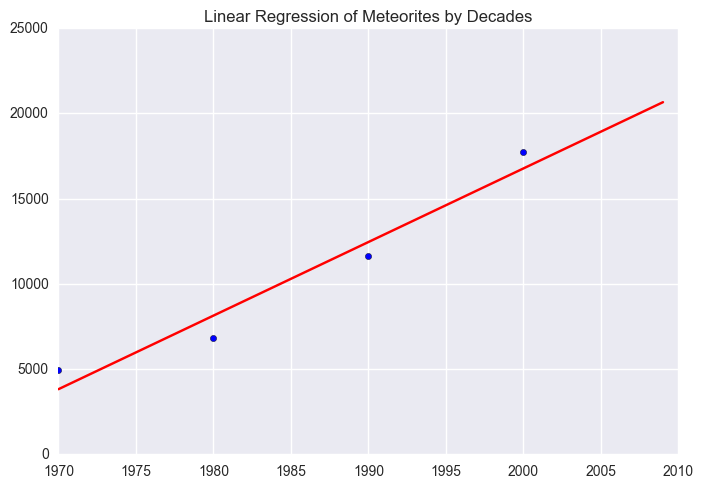

In [43]:
# Dataframe for frequency by decades 1970-2010 created 
years = ML_Frq_By_Year[(ML_Frq_By_Year.year >= 1970) & (ML_Frq_By_Year.year < 2010)]
years = years.groupby(((years.year)//10)*10).sum()
years = years.drop('year', 1)
years = years.reset_index()

plt.scatter(years.year, years.frequency)

# Predicative modeling where freq is independent and year dependent
model = smf.ols("frequency ~ year ",
                data = years)

result = model.fit()

# Setting beta zero and beta one
b0 = result.params[0]
b1 = result.params[1]

# plotting line with mean() function
x = years.year.mean()
y = years.frequency.mean()

# Setting range and plotting linear regression line
# Then showing plot
x = np.array(range(1970, 2010))  
y = b1*x+b0
plt.plot(x, y,
         color ='r')
plt.xlim(1970,2010)
plt.title('Linear Regression of Meteorites by Decades')
plt.show()

So what does the data tell us? This proofs that records of meteorite landings are definately **increasing** by decade, and according to previous data we might expect further increase in meteorite landing records in the future. Let's use our predictive model for prediction of the next few decades:

In [44]:
# Linear regression equation for predicting coming decades
# beta values previously defined for above figure

def predictDecade(decade):
    return str(int(round(decade*b1-b0)))

# Predicting coming decades
print("Predictions for decades:\n")
print("2010-2020:   " + predictDecade(2010) + " meteorite landings")
print("2020-2030:   " + predictDecade(2020) + " meteorite landings")
print("2030-2040:   " + predictDecade(2030) + " meteorite landings")
print("2040-2050:   " + predictDecade(2040) + " meteorite landings")

Predictions for decades:

2010-2020:   1713990 meteorite landings
2020-2030:   1718306 meteorite landings
2030-2040:   1722622 meteorite landings
2040-2050:   1726938 meteorite landings


Given the increase in meteorite records will continue as it has, these numbers can be a semi-accurate predicative analysis of coming decades, meaning we have successfully used predictive analysis using our data.

### Were can we expect to find the most meteorites in the future?

As we saw before when visualizing latitude and year, latitudes of recorded meteorite landings can distinctly be classified into groups - or clusters. Let's use the clustering method to analyse different groups of latitude.

In [45]:
# Building a predictive cluster model

ML_latyear = ValidMLData.iloc[:,[6,7,8]]                        # extracting year and location
ML_latyear_norm = ML_latyear.iloc[:,[0,1]]                      # extracting year and latitude
ML_latyear_norm = (ML_latyear_norm-ML_latyear_norm.min())/(ML_latyear_norm.max()-ML_latyear_norm.min()) # Normalizing
km_model = KMeans(n_clusters=3)                                 # Setting clusters to 3
km_model.fit(ML_latyear_norm)                                   # Building model
ML_latyear = ML_latyear.assign(cluster=km_model.labels_)        # Assign cluster to data

Now that we've completed the clustering algorithm, let's plot the same figure as before with points belonging to distrinct clusters in distinct colors:

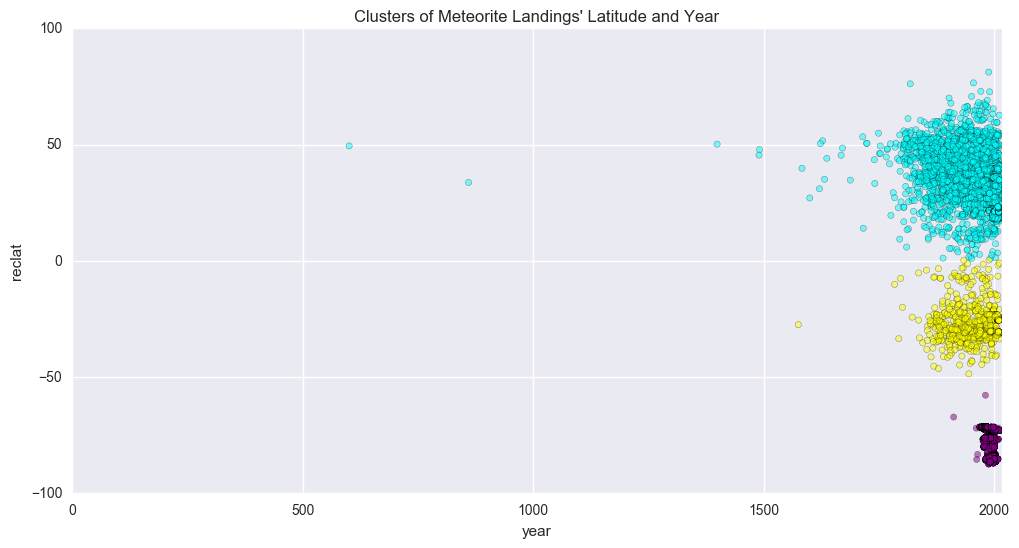

In [46]:
# Create a colormap
colormap = np.array(['purple',
                     'cyan',
                     'yellow'])
# Create the third (z-value)
z = ML_latyear.cluster.values

# Plot the Models Classifications
ML_latyear.plot("year", "reclat",
            c = colormap[z],
            kind = 'scatter',
            figsize=(12,6),
            alpha = 0.5)
plt.xlim(0,2017)
plt.title("Clusters of Meteorite Landings' Latitude and Year")
plt.show()

Let's speculate ranges of these clusters:

In [47]:
print("Number of entries per cluster: ")
print(str((ML_latyear.cluster.value_counts())))

Number of entries per cluster: 
0    22095
1     8301
2     1289
Name: cluster, dtype: int64


In [48]:
print("First cluster(0):")
print("Year ranges are " + str(ML_latyear[ML_latyear.cluster == 0].year.min()) + 
      " and " + str(ML_latyear[ML_latyear.cluster == 0].year.max()))

print("Second cluster(1):")
print("Year ranges are " + str(ML_latyear[ML_latyear.cluster == 1].year.min()) 
      + " and " + str(ML_latyear[ML_latyear.cluster == 1].year.max()))

print("Third cluster(2):")
print("Year ranges are " + str(ML_latyear[ML_latyear.cluster == 2].year.min()) 
      + " and " + str(ML_latyear[ML_latyear.cluster == 2].year.max()))

First cluster(0):
Year ranges are 1912 and 2011
Second cluster(1):
Year ranges are 601 and 2013
Third cluster(2):
Year ranges are 1575 and 2012


Interestingly, one of the three clusters has by far smallest range of years (first record in cluster in 1912) but the most entries, indicating a lot has been found at this cluster of latitude values in a short period of time. Let's plot the location of the clusters on a map to map this cluster. Visually, it should be the one cluster closest to the south-pole.

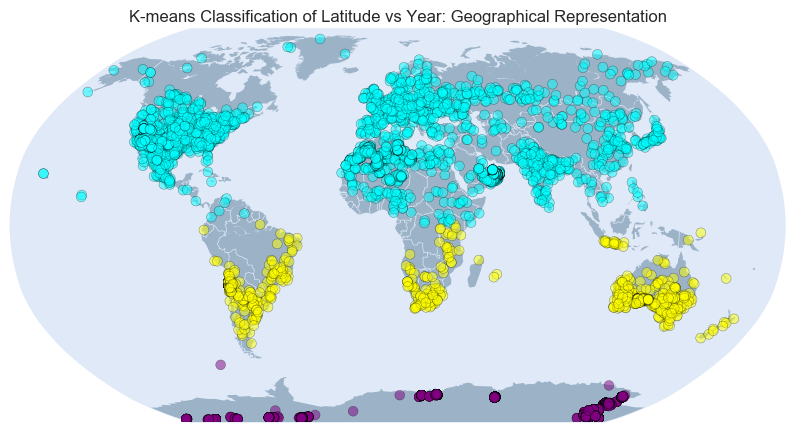

In [49]:
plt.figure(figsize = (10, 6 )) 
ML_cluster_locations = plotProjectBasemap()
x, y = ML_cluster_locations(ML_latyear.reclong.values,
                            ML_latyear.reclat.values) 

ML_cluster_locations.scatter(x, y,              # Data scattered on same basemap
                           marker = 'o',
                           c = colormap[z],
                           zorder = 10,
                           s = 50,
                           alpha = 0.5)

plt.title('K-means Classification of Latitude vs Year: Geographical Representation')
plt.show()

This pretty much answers our question of where we can find the most meteorites nowadays: it's most likely that a present-day meteorite discovery will belong to the Antartica-cluster due to it's recent time span and it's large scope, meaning most meteorites will land there - so just take a refreshing trip to Antartica if you're interested! This perfectly correlates with previous density plot as well but also tells us that the entire amount of meteorites found there has been found only during the past century.

## Conclusions
What we have achieved from this analysis is that we now know that the most dangerous meteorites are classified as iron, and that they fall mainly within America and Mexico. We know now that it is unlikely that a dangerous meteorite's fall would be seen. We also know that meteorite landing discoveries are gradually increasing and that we can expect more meteorites to come. If we would want to research a meteorite, our best chance would be to look for it on the South-Pole, perhaps because recovering a meteorite in an unhabited place is easier.

*Now that we have our answers, how can we use this information?*

Getting these simple answers could be vital. There is high demand for researching meteorites and now we know where to look for them. Areas more prone to get dangerous meteorites can now be more precautious as we know it's not enough to be on the lookout for dangerous meteorites, their fall is usually not visible. We know that if near-earth meteorite is classified as iron, (NASA's *Near Earth Object Program* classifies approaching meteotires) we need to show precaution. This information gathered from project has therefore served it's purpose: it can help minimize damages from meteorites and faciliates their search.

# References

Dataset used were open-source and available online:

- NASA: *Meteorite Landings*, access: https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh. Dataset fetched 05.02.17

Other references:

- Norton, O. Richard. (1998). *Rocks from Space*. Mountain Press Publishing, Missoula, Montana
- Malhotra, A. (2016). *Meteorite Killed Man at Indian College, Says Chief Minister.* The Wall Street Journal.